In [1]:
# Load "autoreload" extension so that code can change; set it so modules are reloaded before execution
%load_ext autoreload
%autoreload 2

In [4]:
import os
import os.path as op

import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import e as CHARGE
from scipy.constants import h as PLANK
from uncertainties import ufloat

from wien2k_parse.core import Wien2kParse as w2k

[[ 1.19719e+21  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  6.03440e+20  0.00000e+00]
 [ 0.00000e+00  0.00000e+00 -1.80063e+21]]
[[ 1.21385e+21  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  6.90540e+20  0.00000e+00]
 [ 0.00000e+00  0.00000e+00 -1.90439e+21]]
[[ 1.23009e+21  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  7.01860e+20  0.00000e+00]
 [ 0.00000e+00  0.00000e+00 -1.93195e+21]]
[[ 1.13939e+21  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  5.22990e+20  0.00000e+00]
 [ 0.00000e+00  0.00000e+00 -1.66238e+21]]
[[ 1.14912e+21  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  5.08100e+20  0.00000e+00]
 [ 0.00000e+00  0.00000e+00 -1.65722e+21]]


Text(0.5, 0, '$ (a - b)/(a + b)\\, 10^{-4}$')

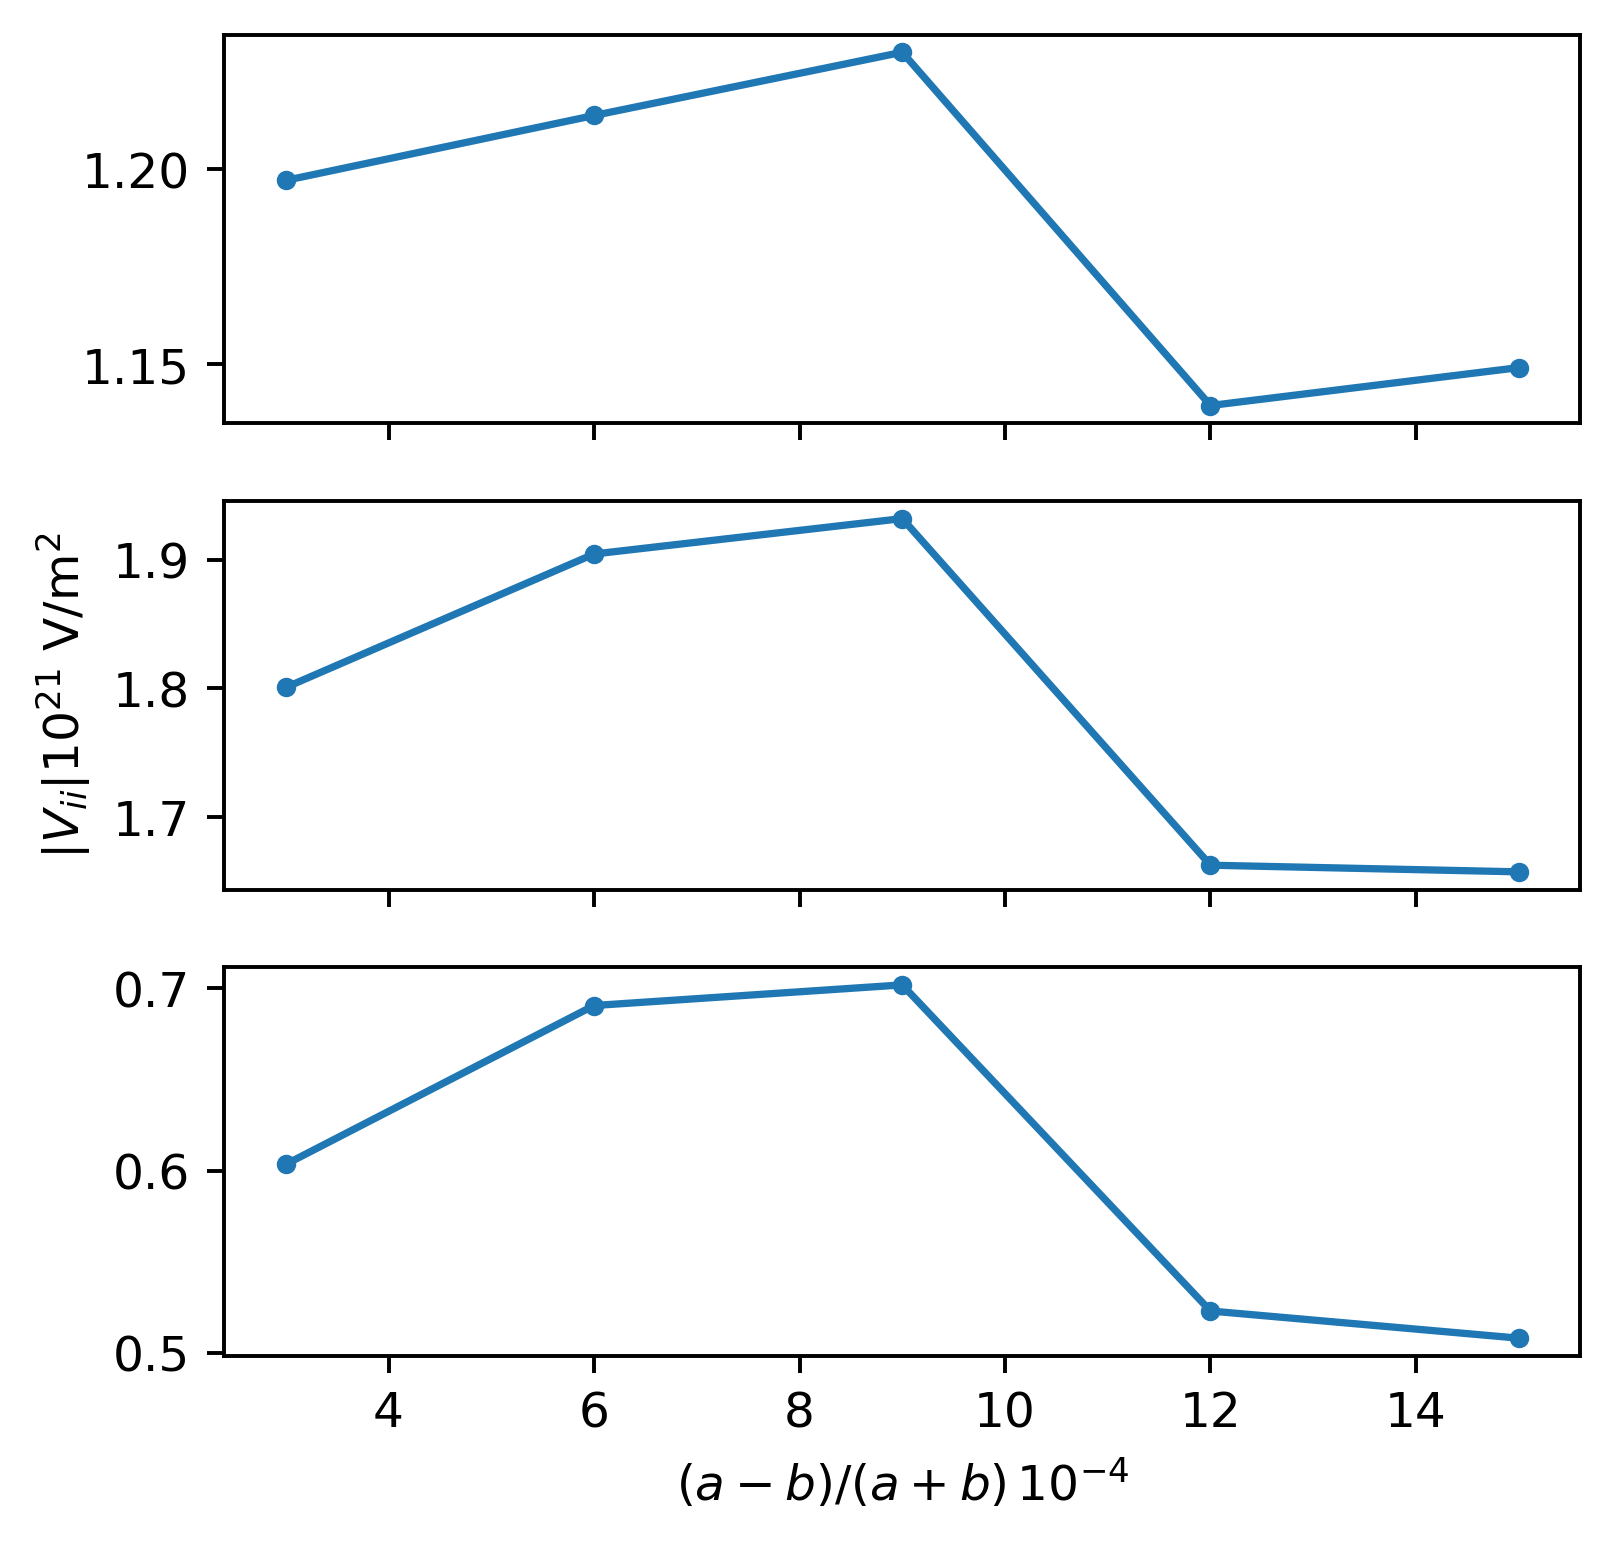

In [46]:
case = 'BaFe2As2'
head_dir = op.abspath('../data/raw/BaFe2As2_orthorhombicity')
efg_site = 'As1'
magmom_site = 'Fe1'

efg_data = np.zeros((5, 4))
magmom_data = np.zeros(5)
delta = np.zeros(5)
for i, d in enumerate(['3', '6', '9', '12', '15']):
    data_dir = op.join(head_dir, d, case)
    wien = w2k(data_dir)
    efg = wien.efg(efg_site)[efg_site].pac_tensor
    magmom_data[i] = wien.magmom[magmom_site]
    eta = (efg[0, 0] - efg[2, 2])/efg[1, 1]
    efg_data[i, :] = np.array([efg[0, 0], efg[2, 2], efg[1, 1], eta])
    print(efg)
    a, b = wien.a, wien.c
    delta[i] = (a - b)/(a + b)

fig, axs = plt.subplots(3, dpi=350, figsize=(5, 5), sharex=True)
Vaa = efg_data[:, 0]/1e21
Vbb = efg_data[:, 1]/1e21
Vcc = efg_data[:, 2]/1e21
eta = np.abs(Vaa - Vbb)/np.abs(Vcc)#efg_data[pCo][:, 3][order]
axs[0].plot(delta/1e-4, np.abs(Vaa), '.-')
axs[1].plot(delta/1e-4, np.abs(Vbb), '.-')
axs[2].plot(delta/1e-4, np.abs(Vcc), '.-')
axs[1].set_ylabel(r'$ |V_{ii}| 10^{21} $ V/m$^2$')
axs[2].set_xlabel(r'$ (a - b)/(a + b)\, 10^{-4}$')